---

## **Introduction**

The final project for this class was to find out with neighborhood in Pittsburg is the best one. In order to find this out I needed a metric and thought saftey was a big one. Due to being in the middle of a pandemic, I thought mapping out pitt by number of vacinated people would be best. This would give the safety area in pitt in regards to covid 19.

The data and information I got can be found 
Here :https://data.wprdc.org/dataset/allegheny-county-covid-19-vaccinations/resource/96cf8cdc-2b8e-43cb-b20b-443f236bcc60

To start I added my imports and started had the object read the data from the dataset

In [32]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [37]:
covid = pd.read_csv("covid.csv")
covid.head(10)

,neighborhood_municipality,total_partially_vaccinated,total_fully_vaccinated,total_fully_vaccinated_w_booster
0,Aspinwall,264,1136,1175
1,Avalon,345,1703,1445
2,Baldwin Borough,1421,7370,7325
3,Baldwin Township,126,678,746
4,Ben Avon,173,680,656
5,Ben Avon Heights,36,144,165
6,Bethel Park,2328,11223,13100
7,Brackenridge,202,1009,719
8,Braddock Hills,127,576,507
9,Bradford Woods,106,460,475


This shows the neighborhoods along with the number of partitaly vaccinated, fully vaccinatd, and fully vaccinated with a booster 

In order to find the safety neighborhood in tests of covid-19, we want to find the place with the most fully vacinated people with a booster. In order to do that we can sort the data by the fully vaccinated with booster collum


In [38]:
covid.nlargest(5,['total_fully_vaccinated_w_booster'])

,neighborhood_municipality,total_partially_vaccinated,total_fully_vaccinated,total_fully_vaccinated_w_booster
39,Mount Lebanon,3463,12008,14594
6,Bethel Park,2328,11223,13100
95,Ross,2444,11774,12461
45,Penn Hills,2818,13253,11626
144,McCandless,2443,10184,11415


These are the top 5 neighborhoods for fully vaccinated boosted people. Next I will show all the neighborhood compared to eachother in a bar graph


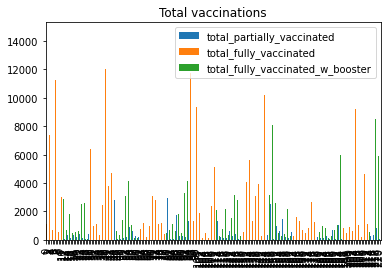

In [40]:
covid.plot.bar(title="Total vaccinations")


While doing this we get a nice look at the data, it is hard to see the names of the neighborhoods. Instead of doing every neighborhood, why dont we just use the top 5 showed above to see how they compare.


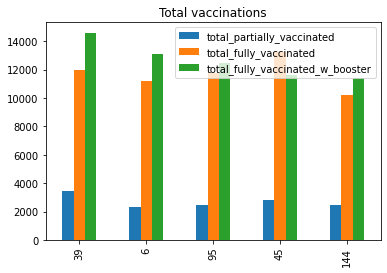

In [44]:

covidTop5 = covid.nlargest(5,['total_fully_vaccinated_w_booster'])
covidT5 = pd.DataFrame(covidTop5)
covidT5.plot.bar(title="Total vaccinations")

Here we can see a patern. In most cases the data goes highest to lowest from fully with booster, fully, to partial. Using this information we can assume that by finding the highest fully boosted neighborhood, we can find the safest place to live overall. To check this however we should get the highest in all catagories

In [47]:
covid.nlargest(3,['total_fully_vaccinated_w_booster'])

,neighborhood_municipality,total_partially_vaccinated,total_fully_vaccinated,total_fully_vaccinated_w_booster
39,Mount Lebanon,3463,12008,14594
6,Bethel Park,2328,11223,13100
95,Ross,2444,11774,12461


In [48]:
covid.nlargest(3,['total_fully_vaccinated'])

,neighborhood_municipality,total_partially_vaccinated,total_fully_vaccinated,total_fully_vaccinated_w_booster
45,Penn Hills,2818,13253,11626
39,Mount Lebanon,3463,12008,14594
95,Ross,2444,11774,12461


In [50]:
covid.nlargest(3,['total_partially_vaccinated'])

,neighborhood_municipality,total_partially_vaccinated,total_fully_vaccinated,total_fully_vaccinated_w_booster
39,Mount Lebanon,3463,12008,14594
80,Shadyside (Pittsburgh),2936,6237,4750
45,Penn Hills,2818,13253,11626


Penn Hills, Ross, And Mount Lebanon are all shown multiple times in the top 3 for each. We can kick Ross out though since it is only in 2, wee the others are in all 3

This leaves us with Mount and Penn Hills

When we can do here to find the safest area is make a point system. For example each first place is 3 points, second is 2, and 3rd is 1. By doing this we can see that Mount has 8 points, beating Penn Hills with only 4 points.

According to this measurment, Mount Lebanon is the safest place in Pittsburg in relation to covid 19 vaccines